In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
mydata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv",index_col="unique_id")

In [ ]:
mydata.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
mydata.shape

(26707, 33)

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
mydata.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [ ]:
mydata.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

**Analyse data**


<Axes: xlabel='h1n1_vaccine', ylabel='count'>

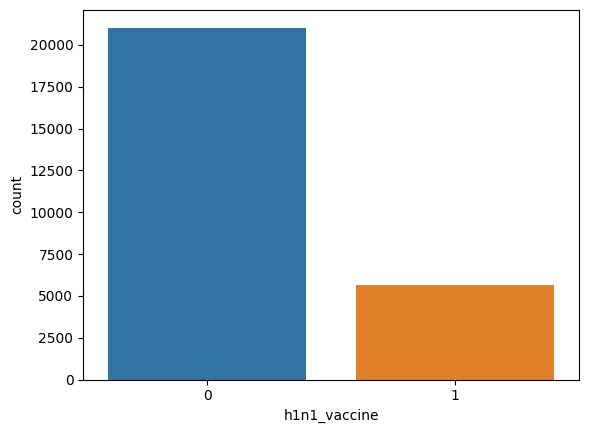

In [ ]:
sns.countplot(x='h1n1_vaccine',data=mydata)

In [ ]:
pd.crosstab(mydata['h1n1_vaccine'],mydata['h1n1_worry'])

h1n1_worry,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,2849,6756,8102,3250
1,447,1397,2473,1341


<Axes: xlabel='h1n1_worry', ylabel='count'>

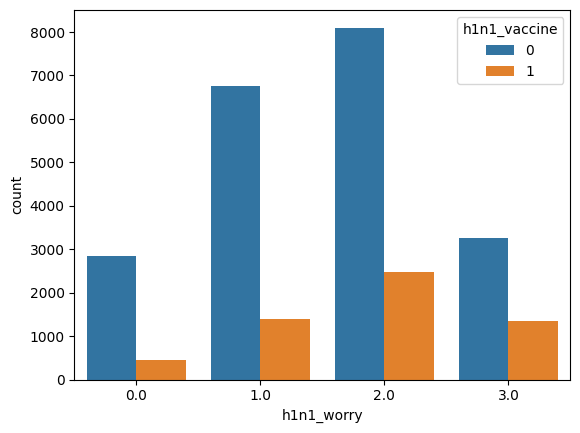

In [ ]:
sns.countplot(x="h1n1_worry",hue="h1n1_vaccine",data=mydata)

In [ ]:
counts = (mydata[['h1n1_worry', 'h1n1_vaccine']]
              .groupby(['h1n1_worry', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_worry,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


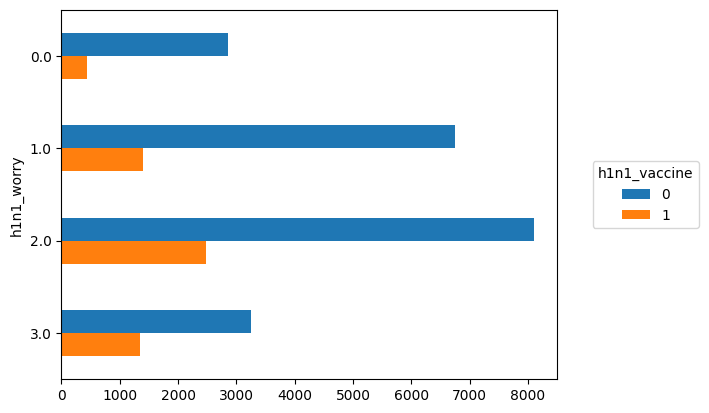

In [ ]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
h1n1_worry_counts = counts.sum(axis='columns')
h1n1_worry_counts

h1n1_worry
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [ ]:
props = counts.div(h1n1_worry_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_worry,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


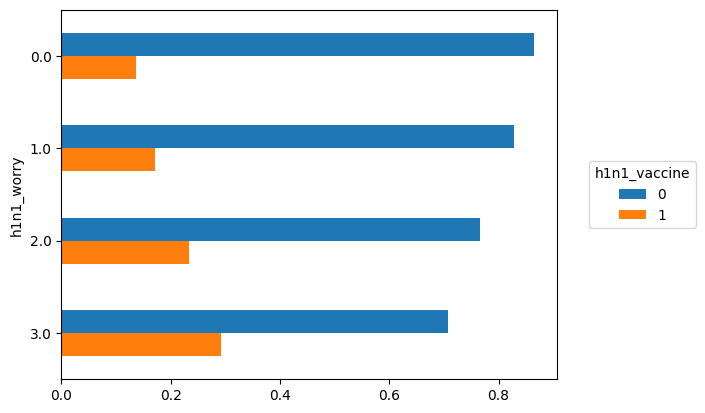

In [ ]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

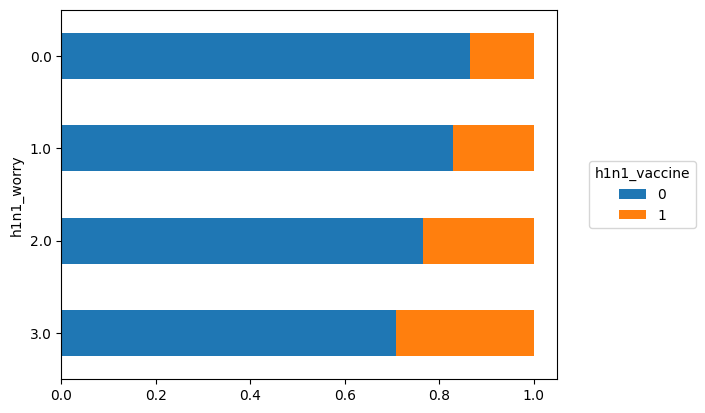

In [ ]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (mydata[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

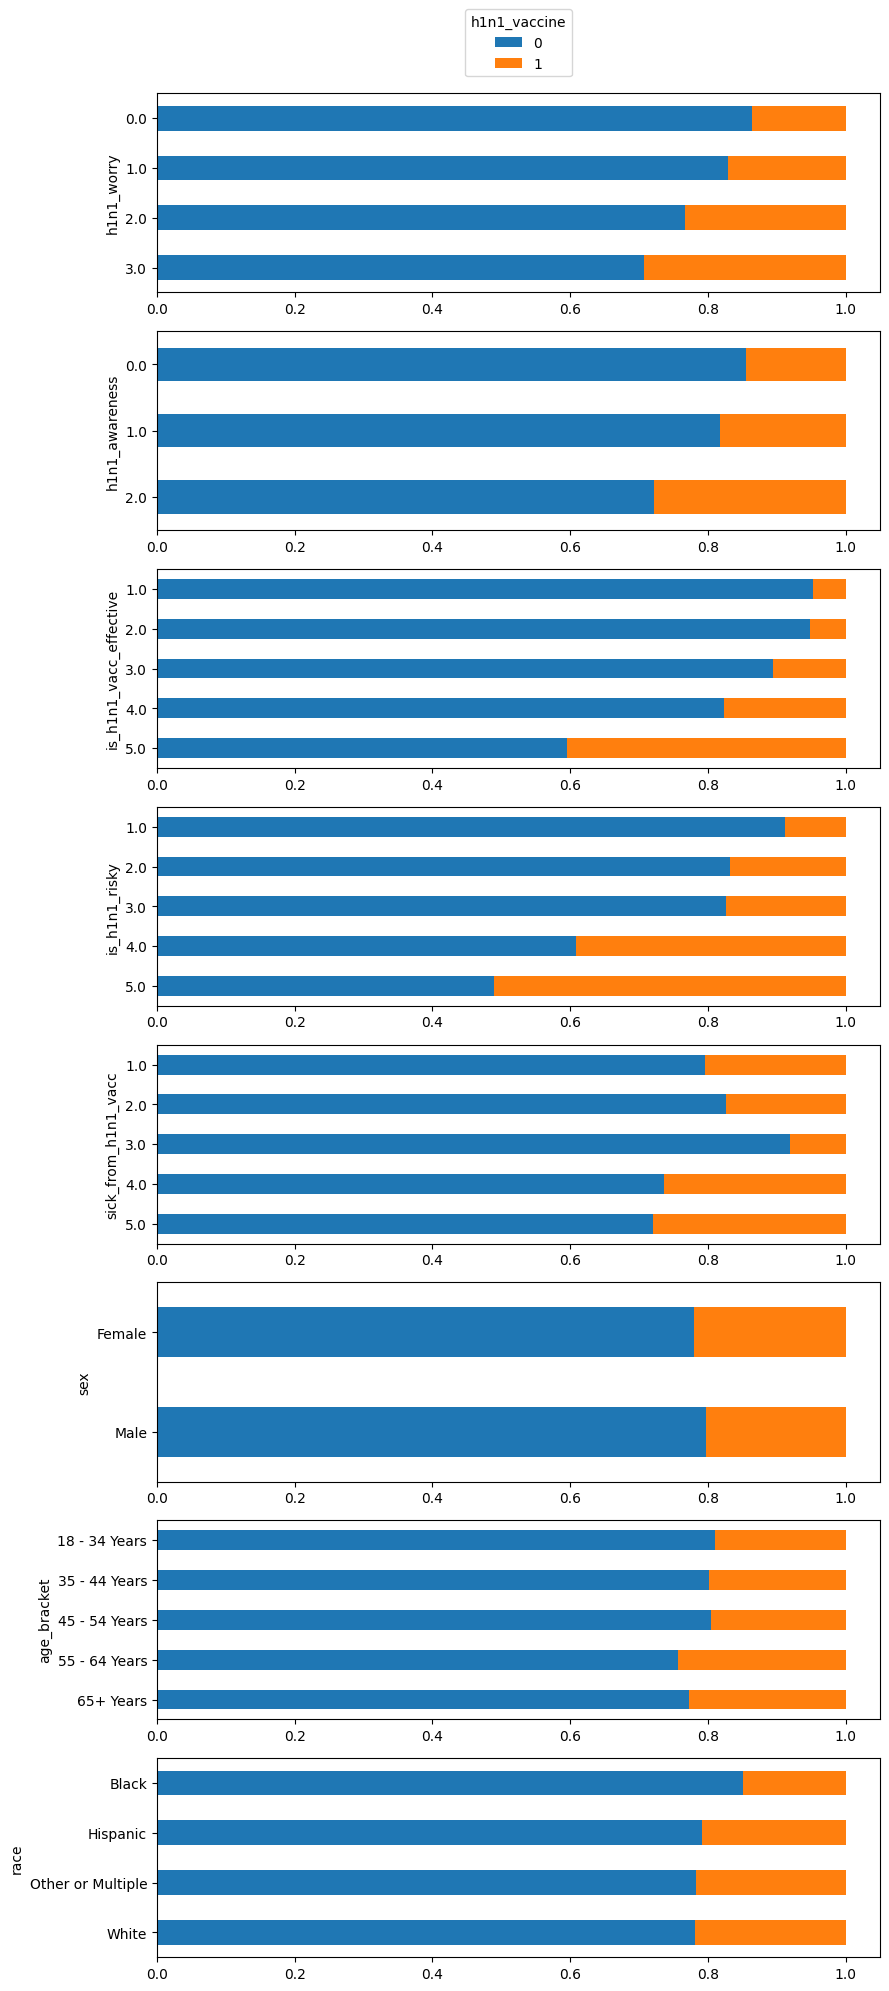

In [ ]:
cols_to_plot = [
    'h1n1_worry',
    'h1n1_awareness',
    'is_h1n1_vacc_effective',
    'is_h1n1_risky',
    'sick_from_h1n1_vacc',
    'sex',
    'age_bracket',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot),1, figsize=(9,len(cols_to_plot)*2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', mydata, ax=ax[idx])

ax[0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
mydata=pd.get_dummies(mydata,columns=['age_bracket','race','sex'])

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
mydata.drop(columns=['qualification','income_level','marital_status','housing_status','employment','census_msa'], axis=1,inplace=True)

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
mydata.dropna(inplace=True)

In [ ]:
mydata.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
age_bracket_18 - 34 Years    0
age_bracket_35 - 44 Years    0
age_bracket_45 - 54 Years    0
age_bracket_55 - 64 Years    0
age_bracket_65+ Years        0
race_Black                   0
race_Hispanic                0
race_Other or Multiple       0
race_Whi

In [ ]:
mydata.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
age_bracket_18 - 34 Years      uint8
age_bracket_35 - 44 Years      uint8
age_bracket_45 - 54 Years      uint8
a

In [ ]:
x=mydata.drop('h1n1_vaccine',axis=1)
y=mydata['h1n1_vaccine']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_train,y_train)

0.8210852027848381

In [ ]:
model.score(x_test,y_test)

0.8216288983621269

In [ ]:
predictions= model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8216288983621269

In [ ]:
from sklearn import metrics

<Axes: >

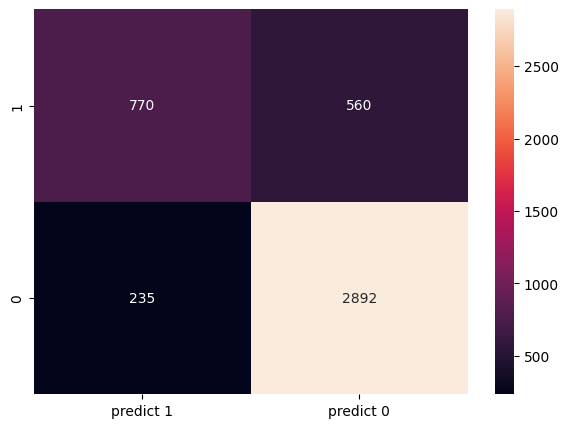

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
mydata_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['predict 1','predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(mydata_cm,annot=True,fmt='g')

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3127
           1       0.77      0.58      0.66      1330

    accuracy                           0.82      4457
   macro avg       0.80      0.75      0.77      4457
weighted avg       0.82      0.82      0.81      4457



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))


0.9996684716543265
0.730087502804577


In [ ]:
model3=DecisionTreeClassifier(max_depth=7)

In [ ]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

0.8295944303237927
0.8126542517388378


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model4=BaggingClassifier(n_estimators=50,base_estimator=model3)

In [ ]:
model4.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  n_estimators=50)

In [ ]:
print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))

0.8407558846281357
0.8200583352030514
